In [1]:
import pyvista as pv
import numpy as np

In [3]:
pv.set_plot_theme("document")
plotter = pv.Plotter(off_screen=True, window_size=[800, 600])

In [4]:
farm_length = 50
farm_width = 30
layer_thickness = 0.5

soil_layers = [
    # saddle brown
    {"name": "Topsoil", "color": "#8B4513", "depth": 0},
    # sienna
    {"name": "Subsoil", "color": "#A0522D", "depth": -layer_thickness},
    # dimgray
    {"name": "Bedrock", "color": "#696969", "depth": -2 * layer_thickness}
]

In [5]:
# creating and adding the soil layers to the scene
for layer in soil_layers:
    # now we are going to create 3d box which is mesh for each layer
    # and the important is that box is defined by its center corrdinates and its dimensions (length, widtth, height)
    center = (farm_length / 2, farm_width / 2, layer["depth"])
    dimensions = (farm_length, farm_width, layer_thickness)

    mesh = pv.Cube(center=center, x_length=dimensions[0], y_length=dimensions[1], z_length=dimensions[2])

    # adding the mesh to the plooter wioth its specified color
    plotter.add_mesh(mesh, color=layer["color"], show_edges=True, edge_color="black")

In [7]:
# now we set the camera position to get a nice isometric view
plotter.camera.position = (farm_length * 1.5, farm_width * 1.5, farm_length * 0.5)
plotter.camera.focal_point = (farm_length / 2, farm_width / 2, 0)
plotter.camera.azimuth = 30
plotter.camera.elevation = 30

# enabling the shadows to make it look more realistic
plotter.enable_shadows()

/Users/aadarshraj/ai_env/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


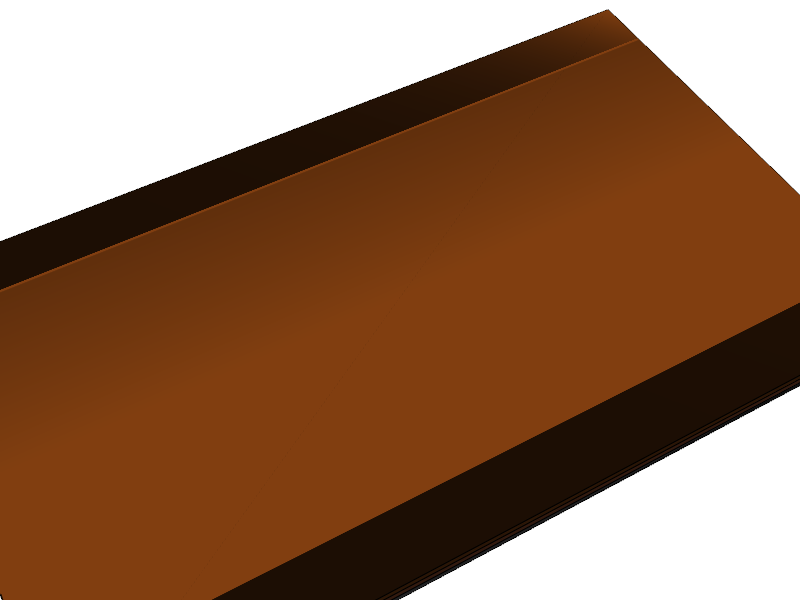

3D plot saved as: 'static_farm_plot.png'


In [8]:
# now show the plot in this notebook directly
plotter.show()

output_filename = "static_farm_plot.png"
plotter.screenshot(output_filename)
print(f"3D plot saved as: '{output_filename}'")